## Paso 1: Planteamiento del problema y recopilación de datos

In [3]:
# Carga de la libreria
import pandas as pd

# Importaremos el conjunto de datos para comenzar a trabajar con él

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Paso 2: Exploración y limpieza de datos

In [4]:
# Obtener las dimensiones
total_data.shape

(1309, 12)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
# Eliminar duplicados
total_data.drop("PassengerId", axis = 1).duplicated().sum()

np.int64(0)

En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de drop_duplicates().

In [8]:
total_data = total_data.drop_duplicates(subset = total_data.columns.difference(['PassengerId']))
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Excluiríamos de nuevo la columna identificativa, aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis:

In [9]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Eliminar información irrelevante

In [10]:
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Paso 3: Análisis de variables univariante

Análisis sobre variables categóricas

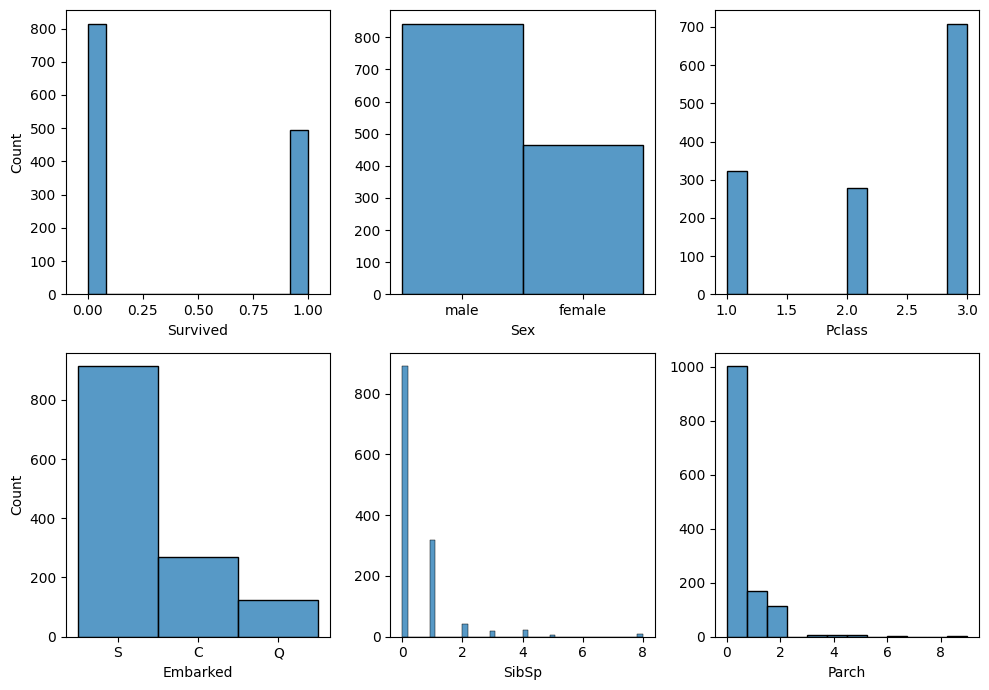

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()